<a href="https://colab.research.google.com/github/Ghanashri-m/CMPE255/blob/prashanth-branch/Housing_Prices_Cleaning_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libraries

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn


warnings.filterwarnings("ignore")

# Load the dataset

In [82]:
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

# Creating a copy of the dataframe to avoid indices conflicts in future
copy_train = train_data.copy()
copy_test = test_data.copy()

In [83]:
copy_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [84]:
copy_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [85]:
sample_submission= pd.read_csv("sample_submission.csv")

In [86]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


This means that we have to keep the id. Because it will be included in the finals submission and the target variable is the **Salesprice**.

In [87]:
housing_dataset  = copy_train

# Clean Data



In [88]:
NAN = [(col, housing_dataset[col].isna().mean()*100) for col in housing_dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [89]:
NAN = NAN[NAN.percentage > 80]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425


In [90]:
housing_dataset.shape

(1460, 81)

In [91]:
#From above we can identify that the columns PoolQC, MiscFeature, Alley and Fence contain significant amount of null values and we can get rid of these colums
housing_dataset = housing_dataset.drop(axis = 1, columns="PoolQC")
housing_dataset = housing_dataset.drop(axis = 1, columns="MiscFeature")
housing_dataset = housing_dataset.drop(axis = 1, columns="Alley")
housing_dataset = housing_dataset.drop(axis = 1, columns="Fence")

In [92]:
housing_dataset.shape

(1460, 77)

Reduced shape of the dataframe after removing the columns which has more than 80 percent of null values

In [93]:
object_columns = housing_dataset.select_dtypes(include=['object'])
numeric_columns =housing_dataset.select_dtypes(exclude=['object'])

Splitting the dataframe into the columns which has numerical and categorical features into object_columns and numeric_columns respectively.

In [94]:
len(object_columns.columns)

39

In [95]:
len(numeric_columns.columns)

38

In total it can be seen that there are in total 39 and 38 columns which are categorical and numeric respectively.

In [96]:
object_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [97]:
numeric_columns.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [98]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64


In [99]:
print(f"Unique values in MasVnrType columns: {housing_dataset['MasVnrType'].unique()}, Total unique value count:{len(housing_dataset['MasVnrType'].unique())} ")
print(f"Unique values in BsmtQual columns: {housing_dataset['BsmtQual'].unique()}, Total unique value count:{len(housing_dataset['BsmtQual'].unique())} ")
print(f"Unique values in BsmtCond columns: {housing_dataset['BsmtCond'].unique()}, Total unique value count:{len(housing_dataset['BsmtCond'].unique())} ")
print(f"Unique values in BsmtExposure columns: {housing_dataset['BsmtExposure'].unique()}, Total unique value count:{len(housing_dataset['BsmtExposure'].unique())} ")
print(f"Unique values in BsmtFinType1 columns: {housing_dataset['BsmtFinType1'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType1'].unique())} ")
print(f"Unique values in BsmtFinType2 columns: {housing_dataset['BsmtFinType2'].unique()}, Total unique value count:{len(housing_dataset['BsmtFinType2'].unique())} ")
print(f"Unique values in GarageType columns: {housing_dataset['GarageType'].unique()}, Total unique value count:{len(housing_dataset['GarageType'].unique())} ")
print(f"Unique values in GarageFinish columns: {housing_dataset['GarageFinish'].unique()}, Total unique value count:{len(housing_dataset['GarageFinish'].unique())} ")
print(f"Unique values in GarageQual columns: {housing_dataset['GarageQual'].unique()}, Total unique value count:{len(housing_dataset['GarageQual'].unique())} ")
print(f"Unique values in GarageCond columns: {housing_dataset['GarageCond'].unique()}, Total unique value count:{len(housing_dataset['GarageCond'].unique())} ")
print(f"Unique values in Electrical columns: {housing_dataset['Electrical'].unique()}, Total unique value count:{len(housing_dataset['Electrical'].unique())} ")
print(f"Unique values in FireplaceQu columns: {housing_dataset['FireplaceQu'].unique()}, Total unique value count:{len(housing_dataset['FireplaceQu'].unique())} ")

Unique values in MasVnrType columns: ['BrkFace' 'None' 'Stone' 'BrkCmn' nan], Total unique value count:5 
Unique values in BsmtQual columns: ['Gd' 'TA' 'Ex' nan 'Fa'], Total unique value count:5 
Unique values in BsmtCond columns: ['TA' 'Gd' nan 'Fa' 'Po'], Total unique value count:5 
Unique values in BsmtExposure columns: ['No' 'Gd' 'Mn' 'Av' nan], Total unique value count:5 
Unique values in BsmtFinType1 columns: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'], Total unique value count:7 
Unique values in BsmtFinType2 columns: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'], Total unique value count:7 
Unique values in GarageType columns: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'], Total unique value count:7 
Unique values in GarageFinish columns: ['RFn' 'Unf' 'Fin' nan], Total unique value count:4 
Unique values in GarageQual columns: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po'], Total unique value count:6 
Unique values in GarageCond columns: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex'], Total unique 

In [100]:
none_categorical_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object_columns[none_categorical_columns] = object_columns[none_categorical_columns].fillna('None')

In [101]:
fewmiss_categorical_columns = ['MasVnrType', 'Electrical']
object_columns[fewmiss_categorical_columns] = object_columns[fewmiss_categorical_columns].fillna(object_columns.mode().iloc[0])

In [102]:
null_categorical_counts = object_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [103]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

Null values in each column:
Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64


## Data Outliers Visualization

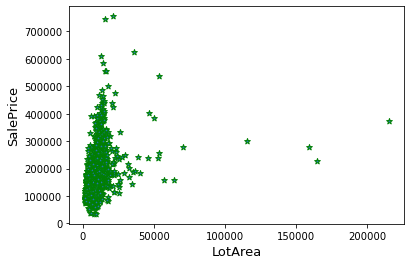

In [130]:
#Identifying the outliers by comparing the feature "LotArea" with SalePrice.

fig, ax = plt.subplots()
ax.scatter(x = train_data['LotArea'], y = train_data['SalePrice'], marker = "*", edgecolors = "Green")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()

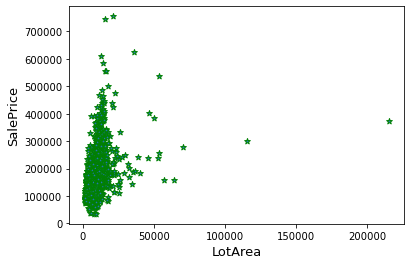

In [131]:
#Deleting outliers by defining the range
train = train_data.drop(train_data[(train_data['LotArea']>100000) & (train_data['SalePrice']<300000)].index)

#Lets plot the graph again to see if the outliers are removed.
fig, ax = plt.subplots()
ax.scatter(train['LotArea'], train['SalePrice'], marker = "*", edgecolors = "Green")
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('LotArea', fontsize=13)
plt.show()